온라인 동영상 서비스(하)<유민>
8번 / 8-1번 - Q8 / Q8_1_1~Q8_1_6
스마트폰 이용 현황(상)<진영>
가장 많이 이용하는 콘텐츠(1번) - Q1A_1~Q1A_20
스스로에 대한 인식(4번)  - Q4
과의존 문제 해결에 관한 인식(하)<재철>
12번 / 12-1번 - Q12 / Q12-1
과의존 상담 및 교육 이용 현황(중)<아영>
9번 / 10번 - Q9A / Q10


p122~123

In [1]:
import pandas as pd
import pymysql

In [2]:
import matplotlib as mp
import matplotlib.pyplot as plt

# 그래프 그리기
fm = mp.font_manager.FontManager()
#한글 지원하는 폰트명으로 재할당
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rc('font', family='Malgun Gothic')

#### DB 접속정보 정의

In [3]:
# db 접속정보 설정
DB_HOST=''
DB_PORT = ''
DB_USER = ''
DB_PASS = ''
DB_NAME=''

#### DB 에서 데이터 조회하여 DataFrame 으로 변환

In [4]:
# db 접속
conn = pymysql.connect(host = DB_HOST, port = DB_PORT, user = DB_USER,
                       passwd = DB_PASS, db = DB_NAME,
                       cursorclass=pymysql.cursors.DictCursor)

cur = conn.cursor()

sql = """
SELECT * FROM response_yjc
"""
cur.execute(sql)

result = cur.fetchall()
df = pd.DataFrame(result)

# db 연결 종료
conn.commit()    
conn.close()

In [5]:
df.columns

Index(['ID', 'Q12', 'Q12_1'], dtype='object')

In [6]:
# 정보 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28575 entries, 0 to 28574
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      28575 non-null  int64  
 1   Q12     25465 non-null  float64
 2   Q12_1   25465 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 669.9 KB
None


In [8]:
df.head()

,ID,Q12,Q12_1
0,1,3.0,1.0
1,2,3.0,2.0
2,3,3.0,1.0
3,4,3.0,1.0
4,5,3.0,2.0


In [10]:
df1 = df[['Q12']]
df1['CNT'] = 1
df1

<ipython-input-10-5dcae537774b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CNT'] = 1


,Q12,CNT
0,3.0,1
1,3.0,1
2,3.0,1
3,3.0,1
4,3.0,1
...,...,...
28570,3.0,1
28571,3.0,1
28572,3.0,1
28573,4.0,1


In [11]:
df1

,Q12,CNT
0,3.0,1
1,3.0,1
2,3.0,1
3,3.0,1
4,3.0,1
...,...,...
28570,3.0,1
28571,3.0,1
28572,3.0,1
28573,4.0,1


In [12]:
df1_grouped = df1.groupby('Q12').sum()
df1_grouped

,CNT
Q12,
1.0,497
2.0,5293
3.0,15580
4.0,4095


In [13]:
df1_grouped['REASON'] = \
[
    '전혀 심각하지 않다',
    '별로 심각하지 않다',
    '다소 심각하다',
    '매우 심각하다'
]

In [14]:
df1_grouped

,CNT,REASON
Q12,,
1.0,497,전혀 심각하지 않다
2.0,5293,별로 심각하지 않다
3.0,15580,다소 심각하다
4.0,4095,매우 심각하다


In [15]:
df1_grouped = df1_grouped.reset_index().drop('Q12', axis=1)

In [16]:
df1_grouped


,CNT,REASON
0,497,전혀 심각하지 않다
1,5293,별로 심각하지 않다
2,15580,다소 심각하다
3,4095,매우 심각하다


In [18]:
total = df1_grouped['CNT'].sum()
df1_grouped['RATE'] = ['{0:.2f}'.format(c / total * 100) for c in df1_grouped['CNT']]
df1_grouped

,CNT,REASON,RATE
0,497,전혀 심각하지 않다,1.95
1,5293,별로 심각하지 않다,20.79
2,15580,다소 심각하다,61.18
3,4095,매우 심각하다,16.08


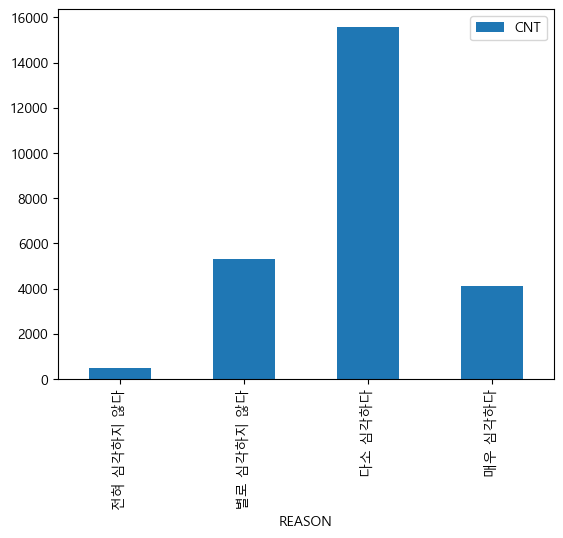

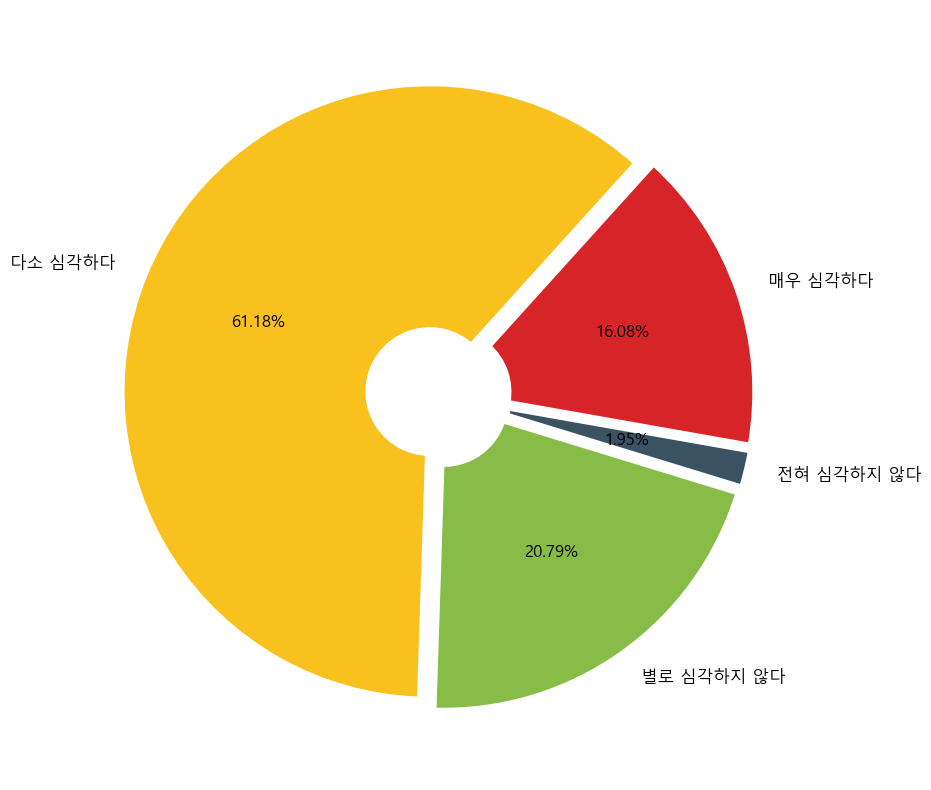

In [19]:
# plt.pie(데이터, 라벨, autopct(전체대비비율)=소수점표시, startangle(부채꼴 시작 각도), shadow(그림자 효과 유무), explode(돌출))

plt.figure(figsize=(10,10))
plt.rc('font', size=12)

ratio = df1_grouped['RATE'].tolist()
labels = df1_grouped['REASON'].tolist()
explode = [0.03, 0.03, 0.03, 0.03]
colors = ['#3A5363','#87BC46','#F8C11E','#D72428'] 
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 4}

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=-10, 
        counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)

plt.savefig('./과의존문제해결에대한인식.png',transparent = True)
plt.show()

In [18]:
mp.pyplot.pie(x=df1_grouped['CNT'], labels=df1_grouped['RATE'])
plt.legend(df1_grouped['REASON'])

In [20]:
df2 = df[['Q12_1']]
df2['CNT'] = 1

df2_grouped = df2.groupby('Q12_1').sum()

<ipython-input-20-10a2da04abe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CNT'] = 1


In [21]:
df2_grouped['REASON'] = \
[
    '개인(성향, 이용행태 등)',
    '기업(스마트폰 제조사, 이통사, 서비스 제공업체 등)',
    '사회문화적 특성(가족간의 소통, 맞벌이 등)',
    '정부(정책, 규제)'
]

In [22]:
df2_grouped = df2_grouped.reset_index().drop('Q12_1', axis=1)

In [23]:
total = df2_grouped['CNT'].sum()
df2_grouped['RATE'] = ['{0:.2f}'.format(c / total * 100) 
                       for c in df2_grouped['CNT']]
df2_grouped

,CNT,REASON,RATE
0,13570,"개인(성향, 이용행태 등)",53.29
1,5087,"기업(스마트폰 제조사, 이통사, 서비스 제공업체 등)",19.98
2,5510,"사회문화적 특성(가족간의 소통, 맞벌이 등)",21.64
3,1298,"정부(정책, 규제)",5.10


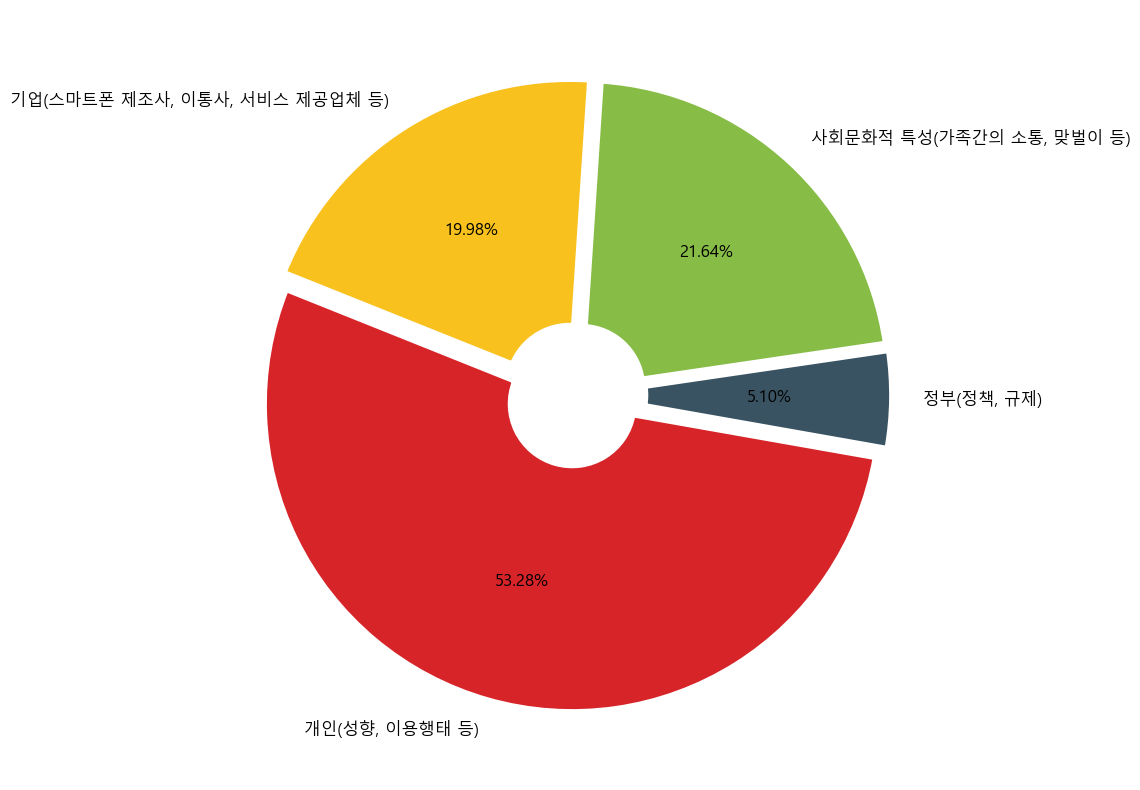

In [24]:
# plt.pie(데이터, 라벨, autopct(전체대비비율)=소수점표시, startangle(부채꼴 시작 각도), shadow(그림자 효과 유무), explode(돌출))

plt.figure(figsize=(10,10))
plt.rc('font', size=12)

ratio = df2_grouped['RATE'].tolist()
labels = df2_grouped['REASON'].tolist()
explode = [0.03, 0.03, 0.03, 0.03]
colors = ['#D72428','#F8C11E','#87BC46','#3A5363'] 
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 4}

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=-10, counterclock=False,
        explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.savefig('./과의존문제에대한원인.png',transparent = True)
plt.show()